In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
file_path = "../easyID3/Price Discrimination - Wobi.xlsx"
df = pd.read_excel(file_path)

In [2]:
df.head()

,Car,Car Type,Model,Mobileye,#Drivers,Driver Gender,Claims in past 3 years,Bought
0,C01,Family,New,Yes,1,Male,No,Yes
1,C02,Family,New,Yes,1,Male,Yes,Yes
2,C03,Family,New,Yes,2,Male,No,Yes
3,C04,Family,New,Yes,2,Male,No,Yes
4,C05,Family,2015-2016,Yes,Unlimited,Male,Yes,Yes


### Exploratory Analysis

In [3]:
missing_values = df.isnull().sum()
unique_values = df.nunique()
data_types = df.dtypes
columns = df.columns
print(f'Missing Values:\n#############\n\n{missing_values}\n')
print(f'Unique Values:\n#############\n\n{unique_values}\n')
print(f'Data Types:\n#############\n\n{data_types}\n')
print(f'Column Names:\n#############\n\n{columns}\n')

Missing Values:
#############

Car                       0
Car Type                  0
Model                     0
Mobileye                  0
#Drivers                  0
Driver Gender             0
Claims in past 3 years    0
Bought                    0
dtype: int64

Unique Values:
#############

Car                       100
Car Type                    4
Model                       6
Mobileye                    2
#Drivers                    3
Driver Gender               2
Claims in past 3 years      2
Bought                      2
dtype: int64

Data Types:
#############

Car                       object
Car Type                  object
Model                     object
Mobileye                  object
#Drivers                  object
Driver Gender             object
Claims in past 3 years    object
Bought                    object
dtype: object

Column Names:
#############

Index(['Car', 'Car Type', 'Model', 'Mobileye', '#Drivers', 'Driver Gender',
       'Claims in past 3 years', 'Bo

#### Some visualizations

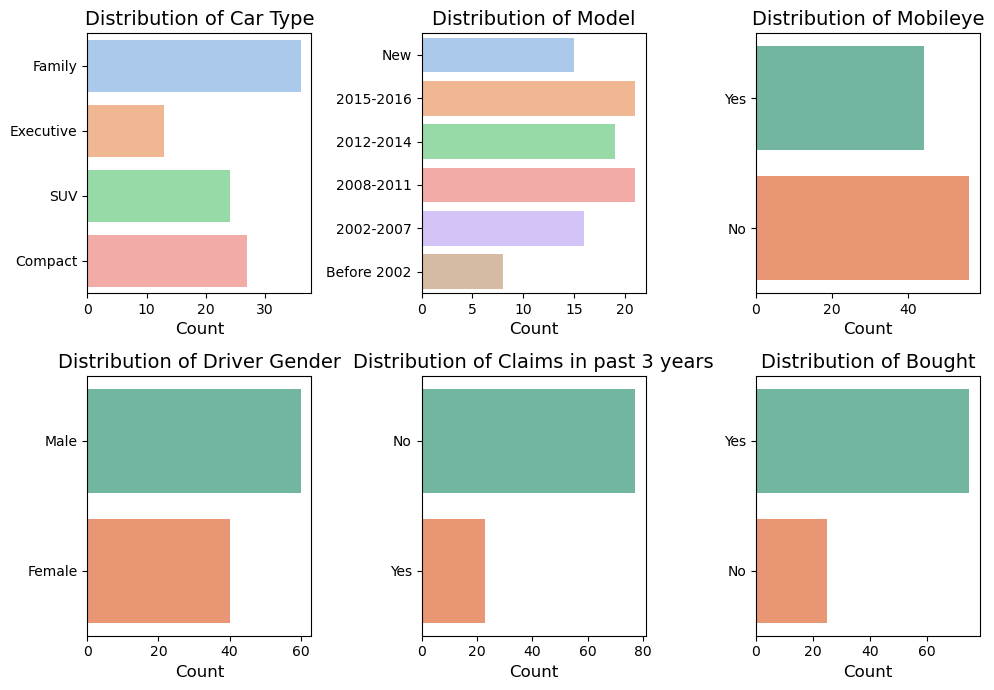

In [4]:
categorical_cols = ['Car Type', 'Model', 'Mobileye', 'Driver Gender', 'Claims in past 3 years', 'Bought']
binary_cols = ['Mobileye', 'Driver Gender', 'Claims in past 3 years', 'Bought']

fig, ax = plt.subplots(2, 3, figsize=(10, 7))

ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    if col in binary_cols:
        color_palette = "Set2"
    else:
        color_palette = "pastel"
    sns.countplot(y=df[col], ax=ax[i], palette=color_palette)
    ax[i].set_title(f'Distribution of {col}', fontsize=14)
    ax[i].set_xlabel('Count', fontsize=12)
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()



### ID3 Decision Tree

In [5]:
!pip install easyID3

In [10]:
from easyID3 import ID3DecisionTreeClassifier

In [ ]:
y = df['Bought']
X = df.drop('Bought', axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
tree = ID3DecisionTree()
tree.fit(X_train, Y_train)
tree.print_tree()